[[0 1 0 1 1 2]
 [0 0 2 0 0 2]
 [0 0 0 0 0 1]
 [0 0 0 0 0 2]
 [0 0 0 0 0 2]
 [0 0 0 0 0 0]]


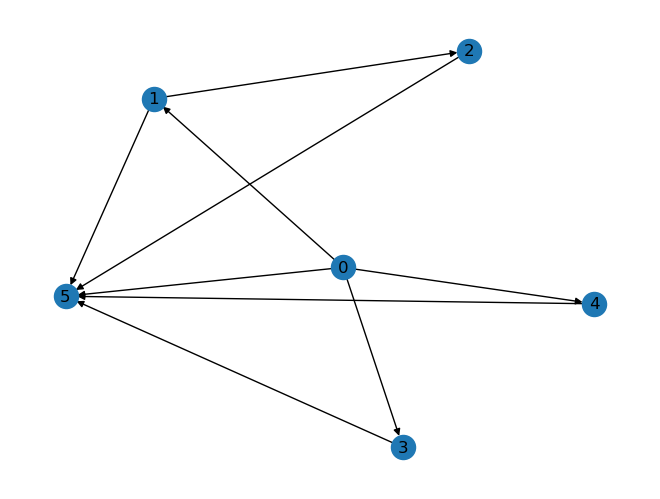

In [33]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def plot_dag(adjaceny_matrix):

    G = nx.DiGraph(adjaceny_matrix)
    nx.draw(G, with_labels=True)

    # draw edge labels
    # edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.show()

def random_dag(n = 5, strength = 2, roots = 1):
    adjaceny_matrix = np.zeros((n, n))

    for i in range(n):
        hadnone = True
        for j in range(i+1, n):
            edge = np.random.randint(0, strength)
            
            if i < roots and j < roots:
                edge = 0

            if (j == n-1) and hadnone:
                edge = np.random.randint(1, strength)
            
            adjaceny_matrix[i, j] = edge
            
            if edge > 0:
                hadnone = False

    # make sure each node has at least one parent
    for i in range(roots,n):
        if np.sum(adjaceny_matrix[:, i]) == 0:
            j = np.random.randint(0, n)
            for _ in range(n):
                if j == i or adjaceny_matrix[i, j] == 1:
                    j = (j + 1) % n
            adjaceny_matrix[j, i] = 1

    return adjaceny_matrix.astype(int)

dag = random_dag(6, strength = 3, roots = 1)
print(dag)
plot_dag(dag)

In [28]:
# take the adjancency matrix to the power of 2 to get the number of paths of length 2
roads = np.array([1, 1, 1, 1, 1, 1])
for i in range(len(roads)):
    new = roads * np.linalg.matrix_power(dag, i+1).T @ roads
    roads[(roads > 0) * (new > 0)] = new[(roads > 0) * (new > 0)]

print(roads)

[ 1  2  2  4 12 12]
